<img src="https://upload.wikimedia.org/wikipedia/commons/5/51/IBM_logo.svg" alt="IBM Logo" width="100" height="100" style="float:left"> </img>
<br>
<br>
<h1> IBM Capstone Project Notebook <h1>

<h2> This Notebook is for Capstone of IBM's Data Science Professional Certification.</h2>

<p> Author for this Notebook is <a href = 'https://www.linkedin.com/in/poddarswakhar/'>Swakhar Poddar.</a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
!conda install lxml html5lib beautifulsoup4 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - beautifulsoup4
    - html5lib
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.1       |           py36_0         168 KB
    html5lib-1.1               |             py_0          92 KB
    lxml-4.5.2                 |   py36hefd8a0e_0         1.4 MB
    ------------------------------------------------------------
                                           Total:         1.6 MB

The following packages will be UPDATED:

    beautifulsoup4: 4.7.1-py36_1         --> 4.9.1-py36_0        
    html5lib:       1.0.1-py_0           --> 1.1-py_0            
    lxml:           4.3.1-py36hefd8a0e_0 --> 4.5.2-py36hefd8a0e_0


beautifulsoup4-4.9.1 | 168 KB    | ##################################### | 100% 
html5lib-1.1         | 92 KB     | #

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df = pd.read_html(url)
df1 = pd.DataFrame(df[0])
df1.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [5]:
df1.tail()

,Postal Code,Borough,Neighbourhood
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."
179,M9Z,Not assigned,Not assigned


In [6]:
df1['Borough'].value_counts()

Not assigned        77
North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
East York            5
East Toronto         5
York                 5
Mississauga          1
Name: Borough, dtype: int64

In [7]:
indexNames = df1[ df1['Borough'] == 'Not assigned' ].index
print(len(indexNames))
df1.drop(indexNames , axis = 0, inplace=True)
df1.reset_index(drop=True, inplace=True)
df1.head(5)

77


,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [8]:
len(df1)

103

In [9]:
df1['Postal Code'].value_counts()

M4A    1
M5J    1
M4W    1
M4C    1
M2P    1
M1H    1
M6L    1
M1M    1
M4K    1
M3J    1
M1W    1
M4R    1
M6N    1
M1C    1
M6H    1
M9V    1
M5N    1
M8X    1
M4B    1
M2N    1
M7Y    1
M8V    1
M6K    1
M9W    1
M1S    1
M6P    1
M9B    1
M5X    1
M7R    1
M5C    1
      ..
M1J    1
M3M    1
M6C    1
M5M    1
M6S    1
M1G    1
M4T    1
M1X    1
M3C    1
M4L    1
M5R    1
M2K    1
M9P    1
M6A    1
M4V    1
M4G    1
M3N    1
M4P    1
M3B    1
M9N    1
M1V    1
M8W    1
M6R    1
M5A    1
M2H    1
M6M    1
M1L    1
M9A    1
M5L    1
M4H    1
Name: Postal Code, Length: 103, dtype: int64

In [10]:
asd = df1.duplicated(subset=['Postal Code'])
print(asd)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
73     False
74     False
75     False
76     False
77     False
78     False
79     False
80     False
81     False
82     False
83     False
84     False
85     False
86     False
87     False
88     False
89     False
90     False
91     False
92     False
93     False
94     False
95     False
96     False
97     False
98     False
99     False
100    False
101    False
102    False
Length: 103, dtype: bool


In [11]:
# checks if duplicate Postal Code is Present in DF or not, check the no. 3 condition 3, the data in wikipedia has been updated so merging no longer needed
# updated information in wikipedia is already merged for duplicate postal codes

z = 'No Duplicate Present'
for i in range(0,len(asd)):
    if asd[i] == True:
        z = 'Yes Duplicate Present'
        break
print('Duplicate Status of Postal Code: ' + z)

Duplicate Status of Postal Code: No Duplicate Present


In [12]:
# cheecks if a Neighbourhood as Not assigned value, after droping he borough Not assigned we dont have any neighborhood with Not assignned value
# so we can skip the no. 3 condition 4 (Not assigned neighborhood will be the same as the borough)

len(df1[df1['Neighbourhood'] == 'Not assigned'])

0

In [13]:
!wget -q -O 'longlang.csv' https://cocl.us/Geospatial_data
print('Data downloaded!')

Data downloaded!


In [14]:
df1_post = df1['Postal Code']
len(df1_post)

103

In [15]:
df2 = pd.read_csv('longlang.csv')
df2.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [16]:
file_post = df2['Postal Code']
len(file_post)

103

In [17]:
file_lat = df2['Latitude']
len(file_lat)

103

In [18]:
file_long = df2['Longitude']
len(file_long)

103

In [19]:
latitude = []
longitude = []
for i in range(0, len(df1_post)):
    a = df1_post[i]
    idx = file_post[file_post == a].index[0]
    latitude.append(file_lat[idx])
    longitude.append(file_long[idx])

In [20]:
len(latitude)

103

In [21]:
len(longitude)

103

In [22]:
df1['Latitude'] = latitude
df1['Longitude'] = longitude

In [23]:
df1.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [24]:
df1.tail()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509
102,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999


In [25]:
CLIENT_ID = 'FCIRFI4JFK5V535EVCJYONSPQ02I4NXZBZP4ZKTKL0RUP5MT' # your Foursquare ID
CLIENT_SECRET = 'M3IHVYFFWR2WFPVTKIRECWKDHO40KBUN15JD0L2YYJSUX5B4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FCIRFI4JFK5V535EVCJYONSPQ02I4NXZBZP4ZKTKL0RUP5MT
CLIENT_SECRET:M3IHVYFFWR2WFPVTKIRECWKDHO40KBUN15JD0L2YYJSUX5B4


In [28]:
import requests
from sklearn.cluster import KMeans
!pip install folium

     |████████████████████████████████| 102kB 12.5MB/s ta 0:00:01


In [29]:
import folium

In [30]:
downtown_data = df1[df1['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
print(len(downtown_data))
downtown_data.head()

19


,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [31]:
map_downtown = folium.Map(location=[43.6548, -79.3883], zoom_start=11)

# add markers to map
for lat, lng, label in zip(downtown_data['Latitude'], downtown_data['Longitude'], downtown_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_downtown)  
    
map_downtown

In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [33]:
downtown_venues = getNearbyVenues(names=downtown_data['Neighbourhood'],
                                   latitudes=downtown_data['Latitude'],
                                   longitudes=downtown_data['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


In [34]:
print(downtown_venues.shape)
downtown_venues.head()

(1241, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


In [35]:
downtown_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Central Bay Street,64,64,64,64,64,64
Christie,16,16,16,16,16,16
Church and Wellesley,77,77,77,77,77,77
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


In [36]:
# one hot encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_onehot['Neighborhood'] = downtown_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]

downtown_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [38]:
downtown_onehot['Neighborhood'].value_counts()

Toronto Dominion Centre, Design Exchange                                                                      100
Richmond, Adelaide, King                                                                                      100
Commerce Court, Victoria Hotel                                                                                100
First Canadian Place, Underground city                                                                        100
Garden District, Ryerson                                                                                      100
Harbourfront East, Union Station, Toronto Islands                                                             100
Stn A PO Boxes                                                                                                95 
St. James Town                                                                                                87 
Church and Wellesley                                                                    

In [39]:
print(downtown_onehot.columns[40])

Butcher


In [40]:
resData = downtown_onehot.filter(regex='Restaurant')
print(resData.columns)

Index(['Afghan Restaurant', 'American Restaurant', 'Asian Restaurant',
       'Belgian Restaurant', 'Brazilian Restaurant', 'Caribbean Restaurant',
       'Chinese Restaurant', 'Colombian Restaurant', 'Comfort Food Restaurant',
       'Doner Restaurant', 'Dumpling Restaurant',
       'Eastern European Restaurant', 'Ethiopian Restaurant',
       'Falafel Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant',
       'French Restaurant', 'German Restaurant', 'Gluten-free Restaurant',
       'Greek Restaurant', 'Indian Restaurant', 'Italian Restaurant',
       'Japanese Restaurant', 'Korean Restaurant', 'Latin American Restaurant',
       'Mediterranean Restaurant', 'Mexican Restaurant',
       'Middle Eastern Restaurant', 'Modern European Restaurant',
       'Molecular Gastronomy Restaurant', 'Moroccan Restaurant',
       'New American Restaurant', 'Portuguese Restaurant', 'Ramen Restaurant',
       'Restaurant', 'Seafood Restaurant', 'Sushi Restaurant',
       'Taiwanese Restaurant'

In [41]:
resData['Neighborhood'] = downtown_onehot['Neighborhood']

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
print(resData.columns)

Index(['Afghan Restaurant', 'American Restaurant', 'Asian Restaurant',
       'Belgian Restaurant', 'Brazilian Restaurant', 'Caribbean Restaurant',
       'Chinese Restaurant', 'Colombian Restaurant', 'Comfort Food Restaurant',
       'Doner Restaurant', 'Dumpling Restaurant',
       'Eastern European Restaurant', 'Ethiopian Restaurant',
       'Falafel Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant',
       'French Restaurant', 'German Restaurant', 'Gluten-free Restaurant',
       'Greek Restaurant', 'Indian Restaurant', 'Italian Restaurant',
       'Japanese Restaurant', 'Korean Restaurant', 'Latin American Restaurant',
       'Mediterranean Restaurant', 'Mexican Restaurant',
       'Middle Eastern Restaurant', 'Modern European Restaurant',
       'Molecular Gastronomy Restaurant', 'Moroccan Restaurant',
       'New American Restaurant', 'Portuguese Restaurant', 'Ramen Restaurant',
       'Restaurant', 'Seafood Restaurant', 'Sushi Restaurant',
       'Taiwanese Restaurant'

In [43]:
cols = resData.columns.tolist()
cols = cols[-1:] + cols[:-1]
resData = resData[cols]

In [44]:
resData.shape

(1241, 43)

In [45]:
resData.head(600)

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
resData_grouped = resData.groupby('Neighborhood').mean().reset_index()
resData_grouped

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.017241,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.00,0.017241,0.000000,0.017241,0.017241,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.034483,0.017241,0.000000,0.017241,0.000000,0.017241,0.000000
1,"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.000000,0.015625,0.000000,0.00,0.000000,0.015625,0.046875,0.031250,0.015625,0.00,0.000000,0.000000,0.015625,0.015625,0.000000,0.000000,0.015625,0.015625,0.000000,0.000000,0.015625,0.015625,0.000000,0.015625,0.000000,0.015625,0.000000
3,Christie,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.062500,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Church and Wellesley,0.012987,0.012987,0.000000,0.000000,0.00,0.012987,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.012987,0.000000,0.012987,0.000000,0.000000,0.000000,0.00,0.000000,0.012987,0.000000,0.064935,0.000000,0.00,0.025974,0.012987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012987,0.038961,0.000000,0.051948,0.000000,0.012987,0.012987,0.000000,0.000000
5,"Commerce Court, Victoria Hotel",0.000000,0.040000,0.020000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.01,0.000000,0.000000,0.030000,0.030000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.070000,0.030000,0.000000,0.000000,0.010000,0.000000,0.020000,0.000000
6,"First Canadian Place, Underground city",0.000000,0.030000,0.030000,0.000000,0.00,0.000000,0.000000,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.01,0.010000,0.000000,0.010000,0.040000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.040000,0.030000,0.020000,0.000000,0.010000,0.000000,0.010000,0.000000
7,"Garden District, Ryerson",0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.020000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.030000,0.030000,0.000000,0.00,0.000000,0.000000,0.020000,0.010000,0.000000,0.000000,0.010000,0.000000,0.020000,0.01000

In [47]:
num_top_venues = 10

for hood in resData_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = resData_grouped[resData_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                           venue  freq
0  Seafood Restaurant             0.03
1  Restaurant                     0.03
2  Italian Restaurant             0.02
3  Greek Restaurant               0.02
4  French Restaurant              0.02
5  Comfort Food Restaurant        0.02
6  Eastern European Restaurant    0.02
7  Sushi Restaurant               0.02
8  Thai Restaurant                0.02
9  Vegetarian / Vegan Restaurant  0.02


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                             venue  freq
0  Afghan Restaurant                0.0 
1  New American Restaurant          0.0 
2  Korean Restaurant                0.0 
3  Latin American Restaurant        0.0 
4  Mediterranean Restaurant         0.0 
5  Mexican Restaurant               0.0 
6  Middle Eastern Restaurant        0.0 
7  Modern European Restaurant       0.0 
8  Molecular Gastronomy Restaurant  0.0 
9  Moroccan Restaurant  

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [49]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = resData_grouped['Neighborhood']

for ind in np.arange(resData_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(resData_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Seafood Restaurant,Restaurant,Eastern European Restaurant,Thai Restaurant,Greek Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Japanese Restaurant,French Restaurant
1,"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",Vietnamese Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
2,Central Bay Street,Italian Restaurant,Japanese Restaurant,Indian Restaurant,Portuguese Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Middle Eastern Restaurant,New American Restaurant,Modern European Restaurant
3,Christie,Italian Restaurant,Restaurant,Vietnamese Restaurant,Dumpling Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
4,Church and Wellesley,Japanese Restaurant,Sushi Restaurant,Restaurant,Mediterranean Restaurant,Indian Restaurant,Mexican Restaurant,American Restaurant,Caribbean Restaurant,Ethiopian Restaurant,Fast Food Restaurant


In [54]:
neighborhoods_venues_sorted.head(50)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Seafood Restaurant,Restaurant,Eastern European Restaurant,Thai Restaurant,Greek Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Japanese Restaurant,French Restaurant
1,"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",Vietnamese Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
2,Central Bay Street,Italian Restaurant,Japanese Restaurant,Indian Restaurant,Portuguese Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Middle Eastern Restaurant,New American Restaurant,Modern European Restaurant
3,Christie,Italian Restaurant,Restaurant,Vietnamese Restaurant,Dumpling Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
4,Church and Wellesley,Japanese Restaurant,Sushi Restaurant,Restaurant,Mediterranean Restaurant,Indian Restaurant,Mexican Restaurant,American Restaurant,Caribbean Restaurant,Ethiopian Restaurant,Fast Food Restaurant
5,"Commerce Court, Victoria Hotel",Restaurant,American Restaurant,Seafood Restaurant,Italian Restaurant,Japanese Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Gluten-free Restaurant,New American Restaurant
6,"First Canadian Place, Underground city",Japanese Restaurant,Restaurant,American Restaurant,Asian Restaurant,Seafood Restaurant,Sushi Restaurant,Colombian Restaurant,Greek Restaurant,Italian Restaurant,Fast Food Restaurant
7,"Garden District, Ryerson",Italian Restaurant,Japanese Restaurant,Fast Food Restaurant,Ramen Restaurant,Middle Eastern Restaurant,Ethiopian Restaurant,Chinese Restaurant,New American Restaurant,Vietnamese Restaurant,Modern European Restaurant
8,"Harbourfront East, Union Station, Toronto Islands",Restaurant,Italian Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,New American Restaurant,Chinese Restaurant,Dumpling Restaurant
9,"Kensington Market, Chinatown, Grange Park",Vegetarian / Vegan Restaurant,Mexican Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Caribbean Restaurant,Japanese Restaurant,Comfort Food Restaurant,Doner Restaurant,Filipino Restaurant,Belgian Restaurant


In [55]:
# set number of clusters
kclusters = 5

downtown_grouped_clustering = resData_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 4, 2, 3, 0, 0, 4, 1, 1], dtype=int32)

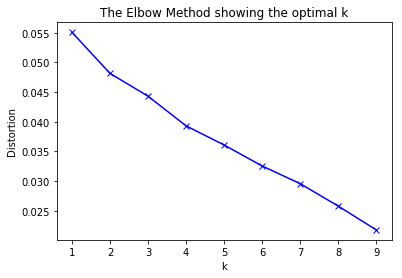

In [56]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(downtown_grouped_clustering)
    kmeanModel.fit(downtown_grouped_clustering)
    distortions.append(sum(np.min(cdist(downtown_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / downtown_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [57]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_merged = downtown_data

downtown_merged.head() # check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [58]:
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Berczy Park,Seafood Restaurant,Restaurant,Eastern European Restaurant,Thai Restaurant,Greek Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Japanese Restaurant,French Restaurant
1,1,"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",Vietnamese Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
2,4,Central Bay Street,Italian Restaurant,Japanese Restaurant,Indian Restaurant,Portuguese Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Middle Eastern Restaurant,New American Restaurant,Modern European Restaurant
3,2,Christie,Italian Restaurant,Restaurant,Vietnamese Restaurant,Dumpling Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
4,3,Church and Wellesley,Japanese Restaurant,Sushi Restaurant,Restaurant,Mediterranean Restaurant,Indian Restaurant,Mexican Restaurant,American Restaurant,Caribbean Restaurant,Ethiopian Restaurant,Fast Food Restaurant


In [59]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [60]:
# create map
map_clusters = folium.Map(location=[43.6548, -79.3883], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_merged['Latitude'], downtown_merged['Longitude'], downtown_merged['Neighbourhood'], neighborhoods_venues_sorted['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [61]:
import seaborn as sns
sns.set(style="whitegrid")

In [62]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels'] == 0]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Berczy Park,Seafood Restaurant,Restaurant,Eastern European Restaurant,Thai Restaurant,Greek Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Japanese Restaurant,French Restaurant
5,0,"Commerce Court, Victoria Hotel",Restaurant,American Restaurant,Seafood Restaurant,Italian Restaurant,Japanese Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Gluten-free Restaurant,New American Restaurant
6,0,"First Canadian Place, Underground city",Japanese Restaurant,Restaurant,American Restaurant,Asian Restaurant,Seafood Restaurant,Sushi Restaurant,Colombian Restaurant,Greek Restaurant,Italian Restaurant,Fast Food Restaurant
12,0,"Richmond, Adelaide, King",Restaurant,Thai Restaurant,American Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Modern European Restaurant,Gluten-free Restaurant,Latin American Restaurant,Mediterranean Restaurant,Colombian Restaurant
14,0,St. James Town,Restaurant,American Restaurant,Moroccan Restaurant,Italian Restaurant,Seafood Restaurant,Comfort Food Restaurant,German Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Middle Eastern Restaurant
16,0,Stn A PO Boxes,Italian Restaurant,Seafood Restaurant,Restaurant,Japanese Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Thai Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,French Restaurant
17,0,"Toronto Dominion Centre, Design Exchange",Restaurant,American Restaurant,Seafood Restaurant,Italian Restaurant,Japanese Restaurant,Asian Restaurant,Sushi Restaurant,French Restaurant,Fast Food Restaurant,Gluten-free Restaurant


In [63]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels'] == 1]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,1,"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",Vietnamese Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
8,1,"Harbourfront East, Union Station, Toronto Islands",Restaurant,Italian Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,New American Restaurant,Chinese Restaurant,Dumpling Restaurant
9,1,"Kensington Market, Chinatown, Grange Park",Vegetarian / Vegan Restaurant,Mexican Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Caribbean Restaurant,Japanese Restaurant,Comfort Food Restaurant,Doner Restaurant,Filipino Restaurant,Belgian Restaurant
10,1,"Queen's Park, Ontario Provincial Government",Japanese Restaurant,Sushi Restaurant,Portuguese Restaurant,Mexican Restaurant,Vietnamese Restaurant,Dumpling Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
11,1,"Regent Park, Harbourfront",French Restaurant,Restaurant,Mexican Restaurant,Vietnamese Restaurant,Dumpling Restaurant,German Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
13,1,Rosedale,Vietnamese Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant


In [64]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels'] == 2]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,2,Christie,Italian Restaurant,Restaurant,Vietnamese Restaurant,Dumpling Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
15,2,"St. James Town, Cabbagetown",Restaurant,Italian Restaurant,Chinese Restaurant,Indian Restaurant,Thai Restaurant,Taiwanese Restaurant,Japanese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Filipino Restaurant


In [65]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels'] == 3]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,3,Church and Wellesley,Japanese Restaurant,Sushi Restaurant,Restaurant,Mediterranean Restaurant,Indian Restaurant,Mexican Restaurant,American Restaurant,Caribbean Restaurant,Ethiopian Restaurant,Fast Food Restaurant
18,3,"University of Toronto, Harbord",Japanese Restaurant,Restaurant,Comfort Food Restaurant,French Restaurant,Italian Restaurant,Sushi Restaurant,Chinese Restaurant,Dumpling Restaurant,Filipino Restaurant,Fast Food Restaurant


In [66]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels'] == 4]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,4,Central Bay Street,Italian Restaurant,Japanese Restaurant,Indian Restaurant,Portuguese Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Middle Eastern Restaurant,New American Restaurant,Modern European Restaurant
7,4,"Garden District, Ryerson",Italian Restaurant,Japanese Restaurant,Fast Food Restaurant,Ramen Restaurant,Middle Eastern Restaurant,Ethiopian Restaurant,Chinese Restaurant,New American Restaurant,Vietnamese Restaurant,Modern European Restaurant


In [67]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster Labels'] == 5]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
